# Tutorial: Convergence


### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what remains:

$$i_t = y_t - c_t$$ 

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount factor.

For now, we ignore the objective and assume that the saving rate $s=\frac{c_t}{y_t}$ is constant over time.

__Create a `NamedTuple` to hold parameter values $\beta=0.96$, $\delta=0.1$, $\alpha=0.3$, $\gamma=4$.__ 

In [3]:
t = (0.96, 0.1,0.3, 4 )
t[1]
t[2]

0.1

In [5]:
p = (;  β=0.96, δ=0.1, α=0.3, γ=4 )
p[1]
p.β

0.96

In [8]:
# other option
# Dictionary: 
d = Dict( :β=>0.96, :δ=>0.1)
d[:δ]

0.1

__Write down the formula of function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.__

$$k_{t+1} = (1-δ) k_t + (1- s) k_t^{\alpha}$$

__Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent $f$ for a given calibration__

In [14]:
# many ways to define functions

# full version
function myfun(x)
    y = x^2 + 1
    return y
end

#inline version
myfun_inline(x) = x^2+1

# anonymous
x -> (x^2+1)

myfun_inline (generic function with 1 method)

In [16]:
myfun(0.1) == myfun_inline(0.1) == (x -> (x^2+1))(0.1)

true

In [38]:
# syntactic for named tuples
a = 0.3
b = 10
(;a, b) # equivalent to (;a=a, b=b)


(a = 0.3, b = 10)

In [39]:
(;α, δ) = p
# equivalent to 
# δ = p.δ
# α = p.α

(β = 0.96, δ = 0.1, α = 0.3, γ = 4)

In [49]:
(;x,y,z) = (;z=3, x=1,y=2)
x
y
z

ErrorException: syntax: invalid assignment location "(((parameters x y z) a),)" around /home/pablo/Teaching/eco309/tutorials/2_solow.ipynb:1

In [34]:
function f(k, p; s=0.5)

    (;α, δ) = p

    # δ = p.δ
    # α = p.α
    
    # s = p.s

    kn = k*(1-δ) + k^α*(1-s)

    return kn

end

f (generic function with 1 method)

In [36]:
f(0.5, p; s=0.7)

0.6936757189068707

In [22]:
# names arguments

# optional arguments
# varying number of parameters but no keyword

In [23]:
fun(x,y=0.1) = x + y

fun (generic function with 2 methods)

In [24]:
methods(fun)

# 2 methods for generic function "fun":
[1] fun(x) in Main at /home/pablo/Teaching/eco309/tutorials/2_solow.ipynb:1
[2] fun(x, y) in Main at /home/pablo/Teaching/eco309/tutorials/2_solow.ipynb:1

In [28]:
fun(0.1)
fun(0.2, 0.2)

0.4

In [29]:
gun(x ; y = 0.2) = x^2+ y

gun (generic function with 1 method)

In [30]:
methods(gun)

# 1 method for generic function "gun":
[1] gun(x; y) in Main at /home/pablo/Teaching/eco309/tutorials/2_solow.ipynb:1

In [33]:
gun(0.4)
gun(0.4; y=0.3)
gun(0.4, 0.1)

MethodError: MethodError: no method matching gun(::Float64, ::Float64)
Closest candidates are:
  gun(::Any; y) at ~/Teaching/eco309/tutorials/2_solow.ipynb:1

__Write a function `simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to compute the simulation over `T` periods starting from initial capital level `k0`.__

In [58]:
function simulate(k0, T, p; s=0.5)

    sim = [k0]

    for i ∈ 1:T    # same as for i in ... or for i=...
        # in Julia, intervals contain the lower and upper bound
        k1 = f(k0, p; s=s)

        # add new value to simulation vector
        push!(sim, k1)

        k0 = k1
    end

    return sim
end

simulate (generic function with 1 method)

In [61]:
sim = simulate(0.5, 100, p;)

101-element Vector{Float64}:
 0.5
 0.8561261981781177
 1.2477475382753753
 1.6573008927807404
 2.073393171590884
 2.4883176067712327
 2.8967527254553693
 3.2950061580751355
 3.680539839343968
 4.051654372933684
 ⋮
 9.949900641171165
 9.951039677408726
 9.952099018857133
 9.95308423905062
 9.954000522065433
 9.954852689688693
 9.95564522669805
 9.956382304382648
 9.957067802427053

__Make a nice plot to illustrate the convergence. Do we get convergence from any initial level of capital?__

In [63]:
using Plots

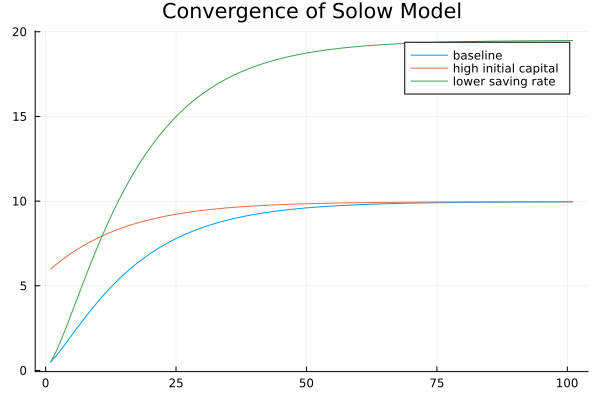

In [69]:
pl= plot(simulate(0.5, 100, p;); label="baseline", title="Convergence of Solow Model")
plot!(pl, simulate(6.0, 100, p;); label="high initial capital")
plot!(pl, simulate(0.5, 100, p;s=0.2); label="lower saving rate")


__Suppose you were interested in using `f` to compute the steady-state. What would you propose to measure convergence speed? To speed-up convergence? Implement these ideas.__